In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [21]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset1/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70312 files belonging to 38 classes.


In [22]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset1/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [23]:
cnn = tf.keras.models.Sequential()

In [24]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [25]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [26]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [27]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [28]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [29]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [30]:
cnn.add(tf.keras.layers.Flatten())

In [31]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [32]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [33]:
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [34]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2198/2198 ━━━━━━━━━━━━━━━━━━━━ 1359s 618ms/step - accuracy: 0.4083 - loss: 2.0774 - val_accuracy: 0.8579 - val_loss: 0.4605
Epoch 2/10
2198/2198 ━━━━━━━━━━━━━━━━━━━━ 1295s 589ms/step - accuracy: 0.8315 - loss: 0.5312 - val_accuracy: 0.9178 - val_loss: 0.2538
Epoch 3/10
2198/2198 ━━━━━━━━━━━━━━━━━━━━ 1262s 574ms/step - accuracy: 0.9017 - loss: 0.3058 - val_accuracy: 0.9356 - val_loss: 0.2031
Epoch 4/10
2198/2198 ━━━━━━━━━━━━━━━━━━━━ 1163s 529ms/step - accuracy: 0.9334 - loss: 0.2072 - val_accuracy: 0.9391 - val_loss: 0.1908
Epoch 5/10
2198/2198 ━━━━━━━━━━━━━━━━━━━━ 1119s 509ms/step - accuracy: 0.9524 - loss: 0.1464 - val_accuracy: 0.9531 - val_loss: 0.1455
Epoch 6/10
2198/2198 ━━━━━━━━━━━━━━━━━━━━ 1103s 502ms/step - accuracy: 0.9617 - loss: 0.1175 - val_accuracy: 0.9564 - val_loss: 0.1528
Epoch 7/10
2198/2198 ━━━━━━━━━━━━━━━━━━━━ 1202s 547ms/step - accuracy: 0.9705 - loss: 0.0882 - val_accuracy: 0.9634 - val_loss: 0.1176
Epoch 8/10
2198/2198 ━━━━━━━━━━━━━━━━━━━━ 1056s 480ms/s

In [37]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2198/2198 ━━━━━━━━━━━━━━━━━━━━ 276s 126ms/step - accuracy: 0.9913 - loss: 0.0267
Training accuracy: 0.9919928312301636


In [38]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 69s 125ms/step - accuracy: 0.9694 - loss: 0.1098
Validation accuracy: 0.9689278602600098


In [39]:
cnn.save('trained_plant_disease_model.keras')

In [40]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6081465482711792,
  0.859014093875885,
  0.9135425090789795,
  0.9398253560066223,
  0.9547019004821777,
  0.964245080947876,
  0.9710149168968201,
  0.9769740700721741,
  0.9786807298660278,
  0.9817669987678528],
 'loss': [1.3228343725204468,
  0.4467621445655823,
  0.26803451776504517,
  0.18575230240821838,
  0.13734860718250275,
  0.1077534556388855,
  0.08707398921251297,
  0.0719624012708664,
  0.06560619920492172,
  0.05497279763221741],
 'val_accuracy': [0.8578989505767822,
  0.9178237915039062,
  0.9356362223625183,
  0.9391076564788818,
  0.9531072378158569,
  0.956407904624939,
  0.963350772857666,
  0.9624971747398376,
  0.9688709378242493,
  0.9689278602600098],
 'val_loss': [0.46054449677467346,
  0.25382092595100403,
  0.20313988626003265,
  0.19080688059329987,
  0.14545808732509613,
  0.1527673453092575,
  0.11760450899600983,
  0.13056136667728424,
  0.09813806414604187,
  0.11438053846359253]}

In [41]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [42]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


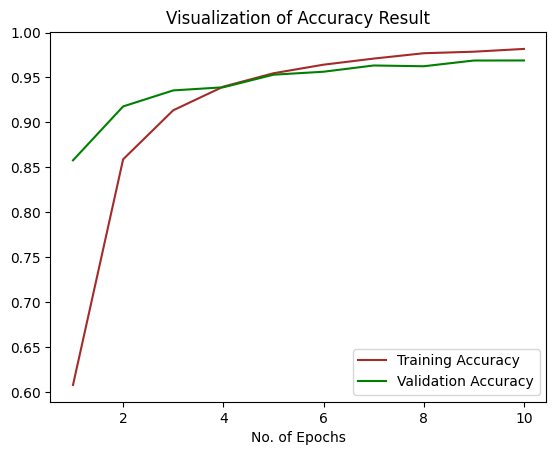

In [43]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [44]:
class_name = validation_set.class_names

In [45]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset1/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [46]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 176s 10ms/step


In [47]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [48]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [49]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [50]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [51]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.98      0.98       504
                                 Apple___Black_rot       1.00      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.99      0.96      0.98       440
                                   Apple___healthy       0.97      0.97      0.97       502
                               Blueberry___healthy       0.97      0.95      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.98      0.97       421
                 Cherry_(including_sour)___healthy       0.96      1.00      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.92      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.97      0.

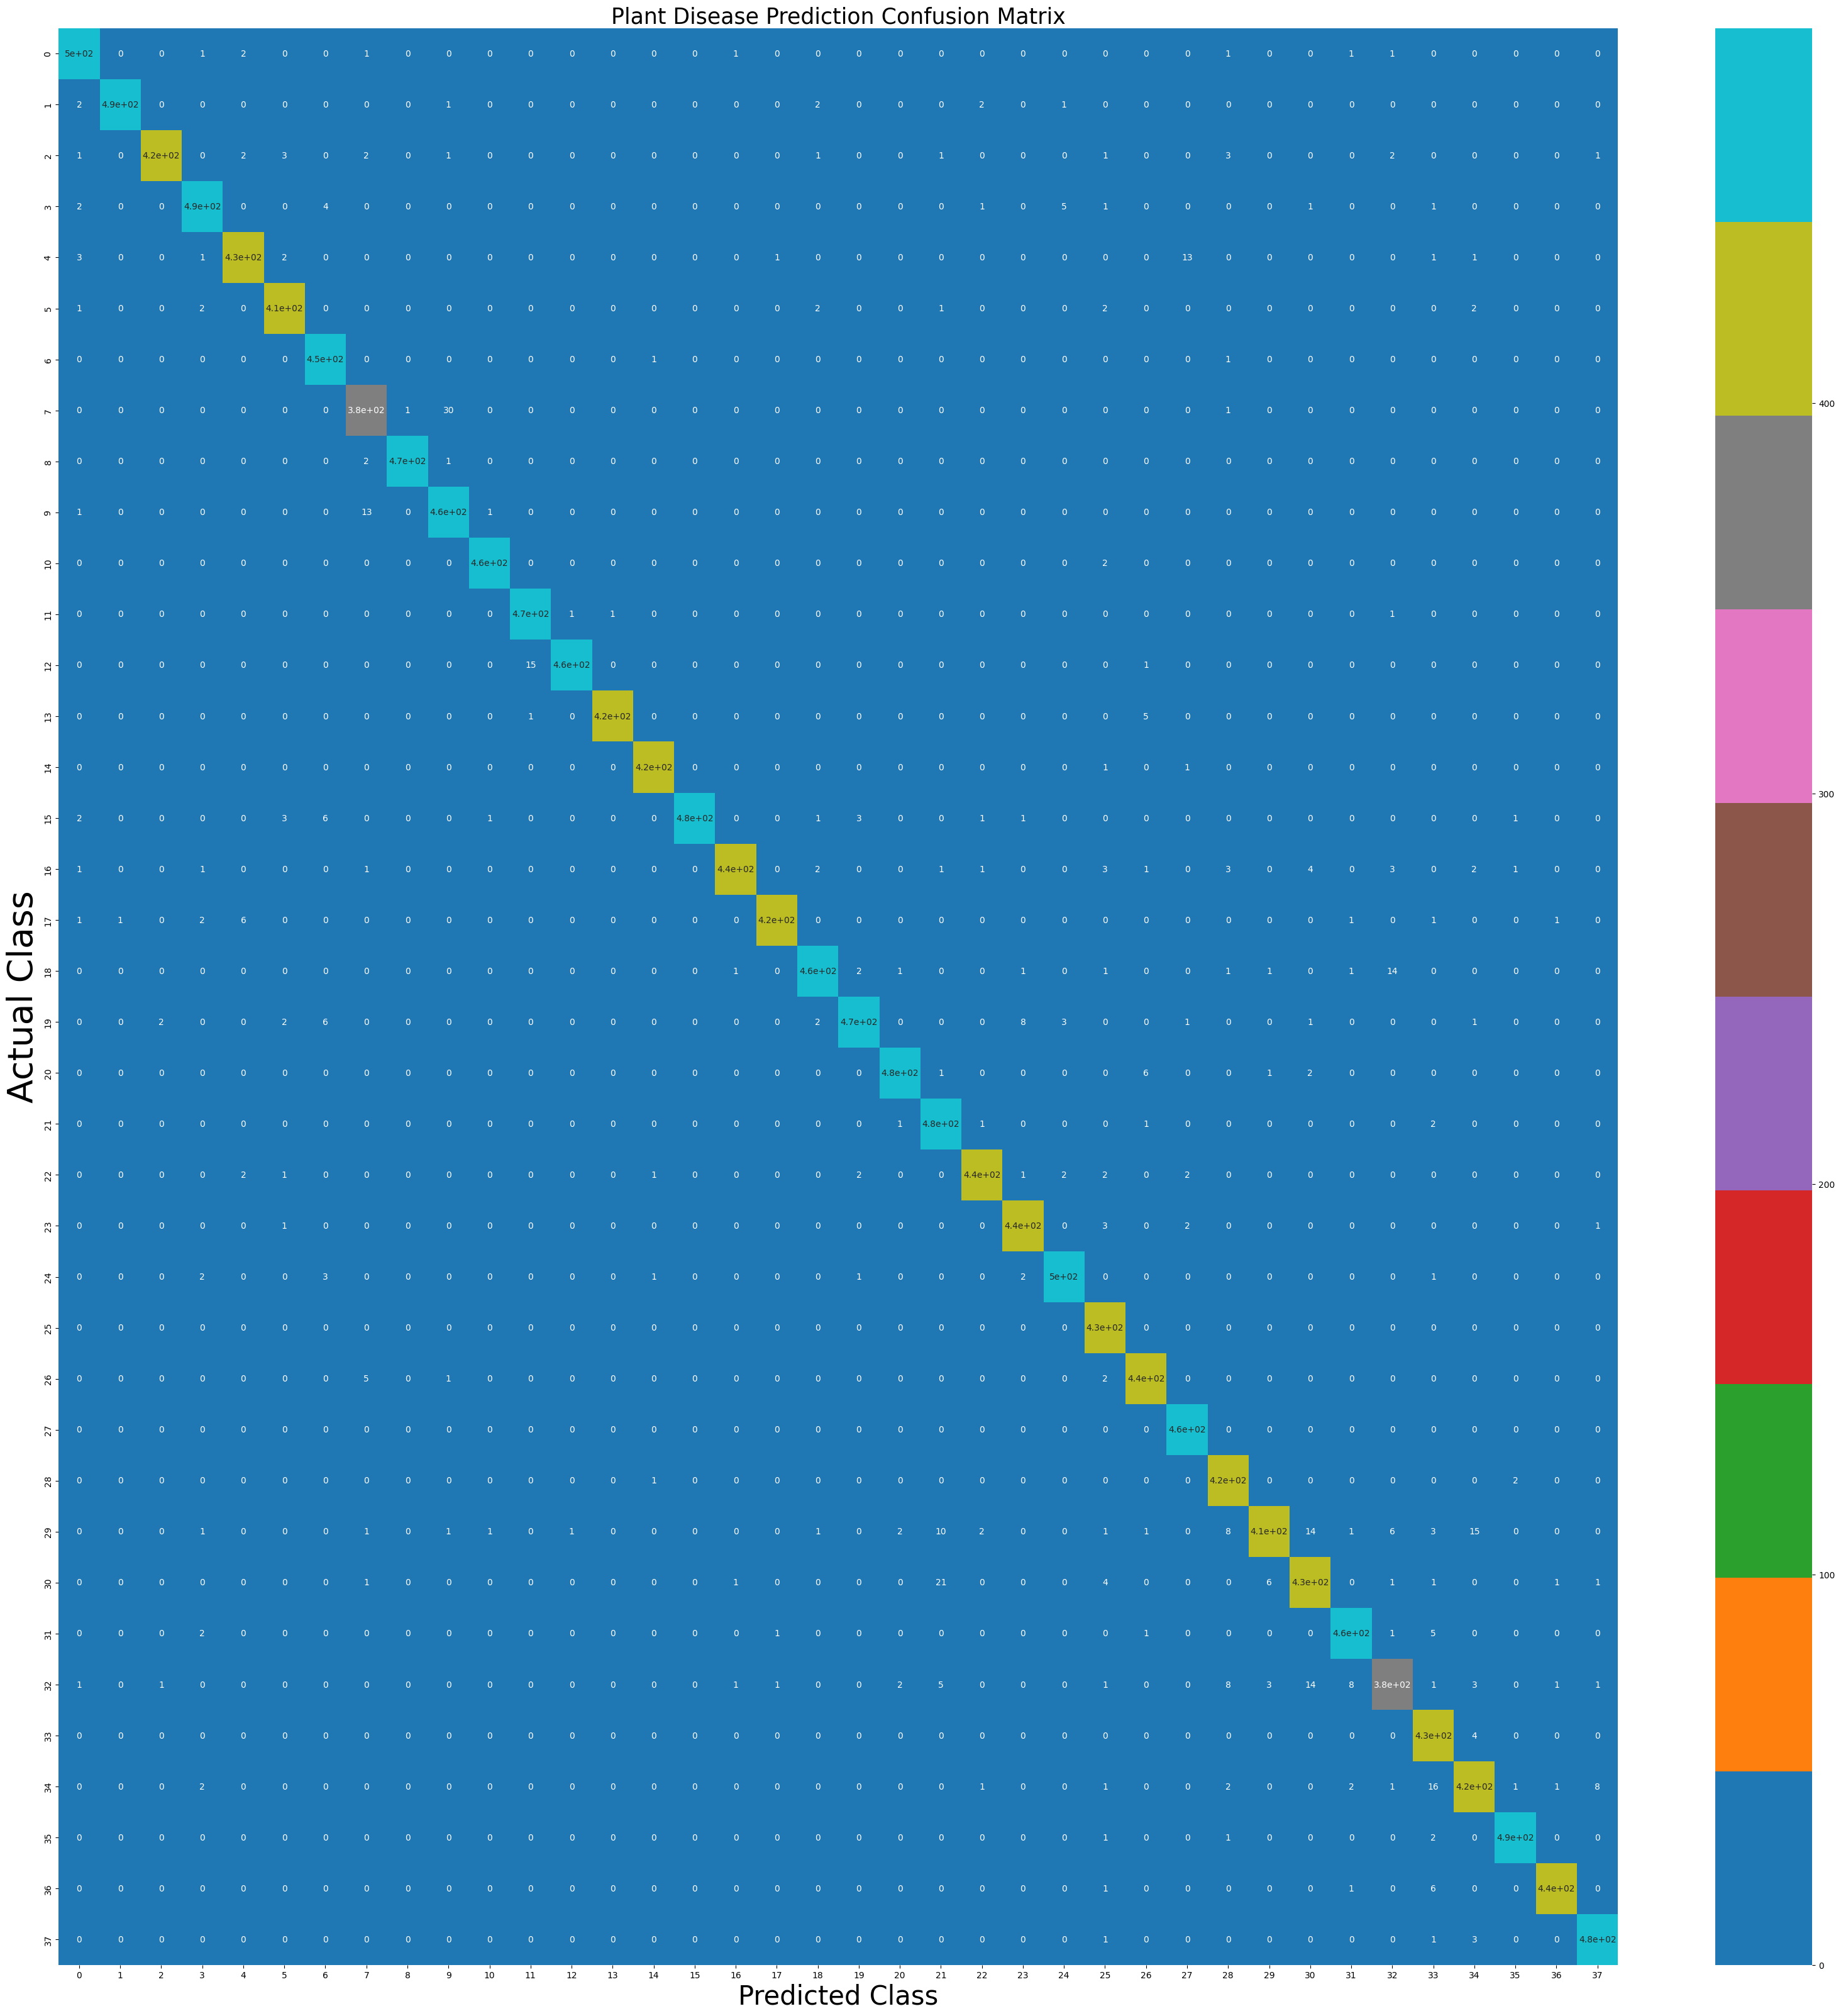

In [52]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10}, cmap='tab10')

plt.xlabel('Predicted Class',fontsize = 30)
plt.ylabel('Actual Class',fontsize = 40)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()